# Logistic Regression 

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values of the independent variables to a value between 0 and 1, which represents the probability of the dependent variable being 1. The logistic function is defined as:

$f(z) = p = \frac{1}{1 + e^{-z}}$


where p is the predicted probability of the dependent variable being 1, e is the base of the natural logarithm, and z is the linear combination of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

Once the model is trained, it can be used to make predictions on new data by inputting the values of the independent variables into the logistic function and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a threshold probability value that is chosen by the user.



## Code
Here's an example implementation using gradient descent optimization:

Cost function: Log loss also known as cross-entropy loss.

$L(\hat{y}, y) = -(ylog\hat{y} + (1-y)log(1-\hat{y}))$

If y = 1: $L(\hat{y}, y) = -log\hat{y} $

If y = 0: $L(\hat{y}, y) = -log(1-\hat{y}) $

Check the derivative [in this link](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d).

In [3]:
import numpy as np

class LogisticRegression:
     
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):
        # initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # gradient descent optimization
        for i in range(self.n_iters):
            # calculate predicted prob and cost
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / X.shape[0]) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
            
            # calculate gradient
            dw = (1 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1 / X.shape[0]) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # convert prob to binary predictions
        return np.round(y_pred).astype(int)

## Test

In [4]:


# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]



[1 1]


## Improvements
here are some possible improvements you could make to the code:

1. Add regularization: Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code:

2. Use a more sophisticated optimization algorithm: Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD:

In [10]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, lr=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.lr = lr
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        n_batches = X.shape[0] // self.batch_size
        
        for i in range(self.n_iters):
            batch_indices = np.random.choice(X.shape[0], self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1/self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1-y_batch) * np.log(1-y_pred))
            
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2*X.shape[0])) * np.sum(self.weights**2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2*X.shape[0])) * np.sum(np.abs(self.weights))
                cost += reg_cost
                
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            
            if self.regularization == 'l2':
                dw += (self.reg_strength / X.shape[0]) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / X.shape[0]) * np.sign(self.weights)
                
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)

## Test

In [11]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]


[1 1]


## Visualize

It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:


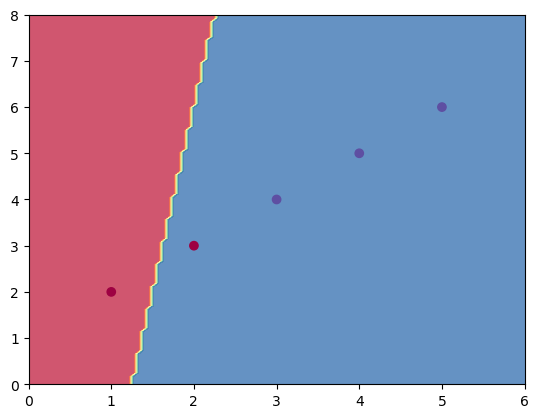

In [13]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(lr=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()
